In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all" 
from datetime import datetime

from scipy.stats import *
np.set_printoptions(precision=6, suppress=True)


In [2]:
#seaborn 그리드 스타일
sns.set_style("whitegrid")

In [3]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

# 1. csv 불러오기

In [4]:
busan2020 = pd.read_csv('./movie_result/busan_movie_2020.csv',thousands=',').drop('Unnamed: 0',axis=1)
seoul2020 = pd.read_csv('./movie_result/seoul_movie_2020.csv',thousands=',').drop('Unnamed: 0',axis=1)

In [5]:
busan_tmp = pd.read_csv('./movie_result/2021_~02부산.csv',thousands=',').drop('Unnamed: 0',axis=1)[1:]
seoul_tmp = pd.read_csv('./movie_result/2021_~02서울.csv',thousands=',').drop('Unnamed: 0',axis=1)[1:]

In [6]:
# 202008~202002 df합치기
# busan_bv = pd.concat([busan2020,busan_tmp]).reset_index(drop=True)
seoul_bv = pd.concat([seoul2020,seoul_tmp]).reset_index(drop=True)

In [7]:
seoul_av = pd.read_csv('./movie_result/2021_03~06서울.csv',thousands=',').drop('Unnamed: 0',axis=1)[1:].reset_index(drop=True)
avr_2019 = pd.read_csv('./movie_result/2019_평균자료_영화.csv')

In [8]:
#string type을 datetime형으로 변환
seoul_bv['주'] = [datetime.strptime(i,"%Y-%m-%d") for i in seoul_bv['주']]
seoul_av['주'] = [datetime.strptime(i,"%Y-%m-%d") for i in seoul_av['주']]

In [9]:
seoul_bv
seoul_av

,지역,매출액,관객수,주
0,서울시,3361656490,368804,2020-08-16
1,서울시,2189550260,247399,2020-08-23
2,서울시,1842116650,200100,2020-08-30
3,서울시,1733144880,188395,2020-09-06
4,서울시,1571785690,172993,2020-09-13
5,서울시,1686750342,194747,2020-09-20
6,서울시,4365204790,464557,2020-09-27
7,서울시,2310220710,243950,2020-10-04
8,서울시,1635498260,175172,2020-10-11
9,서울시,2051049940,235614,2020-10-18


,지역,매출액,관객수,주
0,서울시,2370034110,245237,2021-03-12
1,서울시,2089378170,221908,2021-03-19
2,서울시,2156717370,223590,2021-03-26
3,서울시,2394668990,261118,2021-04-02
4,서울시,1826626560,193633,2021-04-09
5,서울시,1481982720,158687,2021-04-16
6,서울시,1709790330,183278,2021-04-23
7,서울시,1796128240,207101,2021-04-30
8,서울시,2713673630,290264,2021-05-07
9,서울시,1365881880,148365,2021-05-14


# 2. 백신 접종 시행 전 후/ 표본의 차이 확인 (t검정)

In [10]:
np.set_printoptions(precision=6, suppress=True)
seoul_bv_sell = np.array(seoul_bv['매출액'])
seoul_av_sell = seoul_av['매출액']

In [11]:
seoul_bv_sell
seoul_av_sell

array([3361656490, 2189550260, 1842116650, 1733144880, 1571785690,
       1686750342, 4365204790, 2310220710, 1635498260, 2051049940,
       2345716060, 2686707390, 2595964430, 2087858250, 1340672930,
        978608420,  752040660,  606209800, 1249933430,  754663270,
        446257140,  761371720, 2050589220, 2287327000, 2358611200,
       2299673230, 1955377880, 2226500250, 2370034110], dtype=int64)

0     2370034110
1     2089378170
2     2156717370
3     2394668990
4     1826626560
5     1481982720
6     1709790330
7     1796128240
8     2713673630
9     1365881880
10    2551193710
11    2886481360
12    3308331430
13    3216698320
14    3014873260
15    3675390440
Name: 매출액, dtype: int64

In [12]:
seoul_bv['매출액'].describe()
seoul_av['매출액'].describe()

count    2.900000e+01
mean     1.893141e+09
std      8.504186e+08
min      4.462571e+08
25%      1.340673e+09
50%      2.050589e+09
75%      2.310221e+09
max      4.365205e+09
Name: 매출액, dtype: float64

count    1.600000e+01
mean     2.409866e+09
std      6.875886e+08
min      1.365882e+09
25%      1.819002e+09
50%      2.382352e+09
75%      2.918579e+09
max      3.675390e+09
Name: 매출액, dtype: float64

In [13]:
tmp = []
for i in range(13):
    tmp.append(np.random.randint(1722277400,3097454600,dtype='int64'))

In [14]:
#접종이후의 데이터가 접종 전보다 부족해서, 결측치를 평균값으로 대체
seoul_av_sell  = np.append(seoul_av_sell,tmp )

In [15]:
seoul_bv_sell
seoul_av_sell

array([3361656490, 2189550260, 1842116650, 1733144880, 1571785690,
       1686750342, 4365204790, 2310220710, 1635498260, 2051049940,
       2345716060, 2686707390, 2595964430, 2087858250, 1340672930,
        978608420,  752040660,  606209800, 1249933430,  754663270,
        446257140,  761371720, 2050589220, 2287327000, 2358611200,
       2299673230, 1955377880, 2226500250, 2370034110], dtype=int64)

array([2370034110, 2089378170, 2156717370, 2394668990, 1826626560,
       1481982720, 1709790330, 1796128240, 2713673630, 1365881880,
       2551193710, 2886481360, 3308331430, 3216698320, 3014873260,
       3675390440, 2021621403, 2395370825, 2514104414, 2778448443,
       3062363927, 1860415205, 2232433076, 2431950882, 2616042771,
       2735924872, 2830532654, 2649709385, 2174129499], dtype=int64)

<Figure size 720x432 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x268ac6be5e0>,
 'caps': [<matplotlib.lines.Line2D at 0x268ac6beca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x268ac6be280>,
 'medians': [<matplotlib.lines.Line2D at 0x268ac6cf3a0>,
 'fliers': [<matplotlib.lines.Line2D at 0x268ac6cf700>,
 'means': []}

([<matplotlib.axis.XTick at 0x268ac683b50>,
 [Text(1, 0, '백신접종전'), Text(2, 0, '백신접종후')])

Text(0, 0.5, '매출액')

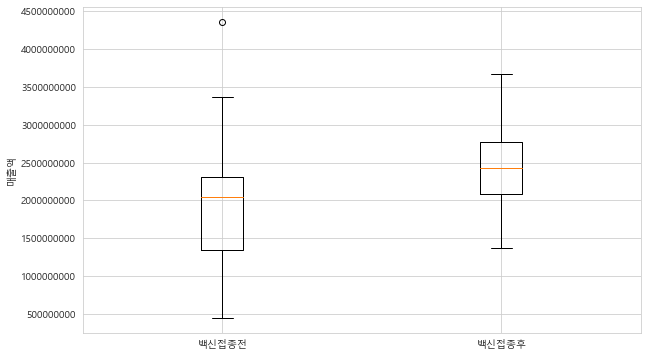

In [16]:
#boxplot을 통한 평균 차이 확인
plt.figure(figsize=(10,6))
plt.boxplot([
            seoul_bv_sell,
            seoul_av_sell
                              ])
#plt.grid()
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 11

plt.xticks([1,2],['백신접종전','백신접종후'])
plt.ylabel('매출액')
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)

In [17]:
shapiro(seoul_av_sell-seoul_bv_sell)
# 귀무가설 :데이터는 정규분포 이다.
# 대립가설: 데이터는 정규분포가 아니다


#pvalue가 0.05보다 크므로 귀무가설 채택

ShapiroResult(statistic=0.9581944942474365, pvalue=0.29649949073791504)

In [18]:
ttest_rel(seoul_av_sell, seoul_bv_sell)

#pvalue 0.05보다 낮으므로, 백신을 맞기전과 맞은후의 매출액에 차이가 존재함.

Ttest_relResult(statistic=2.7057201491247014, pvalue=0.011471649837299982)

# 추가 시각화 (산점도, 회귀선)

(array([18475., 18506., 18536., 18567., 18597., 18628., 18659., 18687.,
        18718., 18748., 18779., 18809.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 0, '주차')

Text(0, 0.5, '매출액')

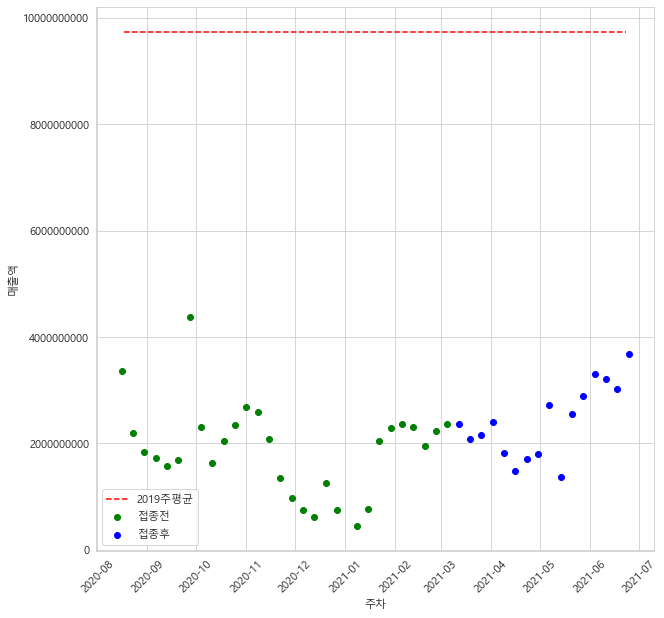

In [19]:
ax = plt.figure(figsize=(10,10))
plt.scatter(seoul_bv['주'], seoul_bv['매출액'], c='g',label='접종전')
plt.scatter(seoul_av['주'], seoul_av['매출액'], c='b',label='접종후')
plt.axhline(int(avr_2019['매출액'][0]),0.05, 0.95, color = 'red', linestyle = '--',label='2019주평균' )
plt.xticks(rotation=45)
plt.xlabel('주차')
plt.ylabel('매출액')
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)

plt.legend(loc='best')

In [20]:
seoul_av['주차'] = [i for i in range(30,46)]
seoul_bv['주차'] = [i for i in range(1,30)]

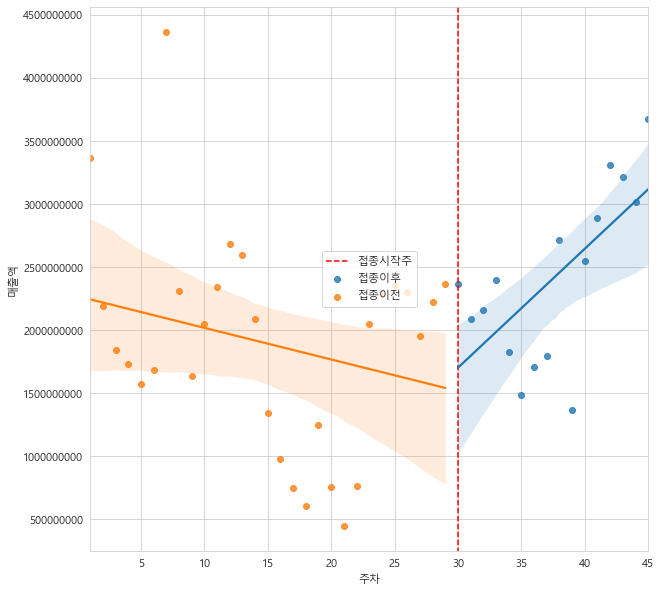

In [21]:
#산점도 + 회귀직선 비교

fig = plt.figure(figsize = [10,10])

#ax = fig.add_subplot(111)
#plt.axhline(int(avr_2019['매출액'][0]),0.05, 0.95, color = 'green', linestyle = '--',label='2019주평균' )

plt.axvline(30,1, 0, color = 'red', linestyle = '--',label='접종시작주' )

ax = sns.regplot(x='주차',y='매출액',data=seoul_av,label='접종이후')
ax = sns.regplot(x='주차',y='매출액',data=seoul_bv,label='접종이전')
ax.legend(loc='center')
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)


# 4. 주간 접종자수 - 매출액 상관분석 && 누적 접종자수 - 매출액 상관분석

### 1. 최종 df 만들기

In [22]:
final_seoul = pd.read_csv('vc_result/서울주간백신정보.csv').drop('Unnamed: 0',axis=1).drop('일자',axis=1)

In [23]:
final_seoul

,1차접종누계,2차접종누계,주간1차접종자수,주간2차접종자수
0,109536,0,35709,0
1,122249,1725,12713,1725
2,141584,6227,19335,4502
3,166563,12397,24979,6170
4,195071,13502,28508,1105
5,294555,13543,99484,41
6,438269,27699,143714,14156
7,563044,47940,124775,20241
8,600548,112781,37504,64841
9,616705,175445,16157,62664


In [24]:
pd.options.display.float_format = '{:.2f}'.format
final_df = pd.concat([seoul_av,final_seoul],axis=1).drop('주차',axis=1)

In [25]:
final_df

,지역,매출액,관객수,주,1차접종누계,2차접종누계,주간1차접종자수,주간2차접종자수
0,서울시,2370034110,245237,2021-03-12,109536,0,35709,0
1,서울시,2089378170,221908,2021-03-19,122249,1725,12713,1725
2,서울시,2156717370,223590,2021-03-26,141584,6227,19335,4502
3,서울시,2394668990,261118,2021-04-02,166563,12397,24979,6170
4,서울시,1826626560,193633,2021-04-09,195071,13502,28508,1105
5,서울시,1481982720,158687,2021-04-16,294555,13543,99484,41
6,서울시,1709790330,183278,2021-04-23,438269,27699,143714,14156
7,서울시,1796128240,207101,2021-04-30,563044,47940,124775,20241
8,서울시,2713673630,290264,2021-05-07,600548,112781,37504,64841
9,서울시,1365881880,148365,2021-05-14,616705,175445,16157,62664


In [26]:
final_df['주간접종자합계'] = final_df['주간1차접종자수']+final_df['주간2차접종자수']
final_df['누적접종자합계'] = final_df['1차접종누계']+final_df['2차접종누계']

In [27]:
final_df = final_df[['지역','주',
                     '매출액',
                     '관객수',
                     '1차접종누계',
                     '2차접종누계',
                     '누적접종자합계',
                     '주간1차접종자수',
                     '주간2차접종자수',
                     '주간접종자합계']]

In [28]:
final_df

,지역,주,매출액,관객수,1차접종누계,2차접종누계,누적접종자합계,주간1차접종자수,주간2차접종자수,주간접종자합계
0,서울시,2021-03-12,2370034110,245237,109536,0,109536,35709,0,35709
1,서울시,2021-03-19,2089378170,221908,122249,1725,123974,12713,1725,14438
2,서울시,2021-03-26,2156717370,223590,141584,6227,147811,19335,4502,23837
3,서울시,2021-04-02,2394668990,261118,166563,12397,178960,24979,6170,31149
4,서울시,2021-04-09,1826626560,193633,195071,13502,208573,28508,1105,29613
5,서울시,2021-04-16,1481982720,158687,294555,13543,308098,99484,41,99525
6,서울시,2021-04-23,1709790330,183278,438269,27699,465968,143714,14156,157870
7,서울시,2021-04-30,1796128240,207101,563044,47940,610984,124775,20241,145016
8,서울시,2021-05-07,2713673630,290264,600548,112781,713329,37504,64841,102345
9,서울시,2021-05-14,1365881880,148365,616705,175445,792150,16157,62664,78821


### 2. 누적 접종자수

Text(0, 0.5, '%')

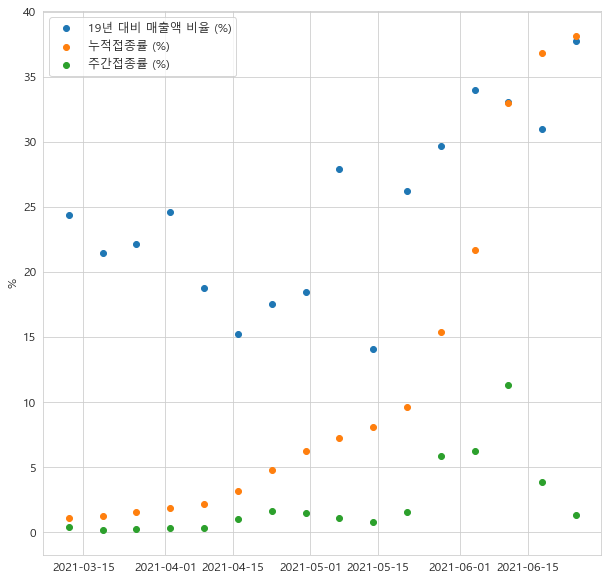

In [29]:
# 
plt.rcParams["figure.figsize"] = (10, 10)
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.scatter(final_df['주'], final_df['매출액']/int(avr_2019['매출액'][0])*100,label='19년 대비 매출액 비율 (%)')
plt.scatter(final_df['주'], final_df['누적접종자합계']/9828094*100,label='누적접종률 (%)')
plt.scatter(final_df['주'], final_df['주간접종자합계']/9828094*100,label='주간접종률 (%)')
plt.ylabel('%')
plt.legend(loc='best')

Text(0.5, 1.0, '매출액 , 누적접종률 산점도')

Text(0.5, 0, '매출액(억)')

Text(0, 0.5, '누적접종률(%)')

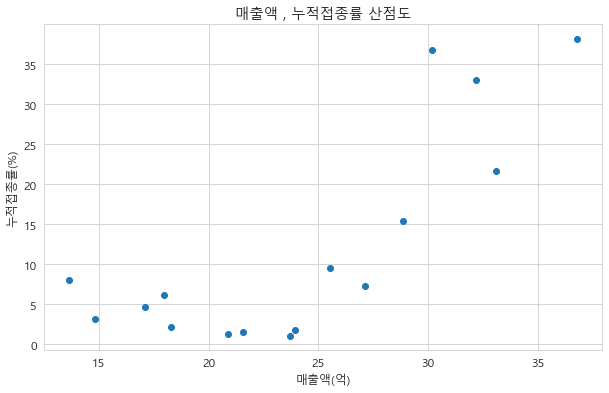

In [30]:
#누적접종률 - 2019년 대비 매출액 매출액 산점도
plt.rcParams["figure.figsize"] = (10, 6)
plt.scatter(final_df['매출액']/100000000, final_df['누적접종자합계']/9828094*100)
plt.title('매출액 , 누적접종률 산점도')

plt.xlabel('매출액(억)')
plt.ylabel('누적접종률(%)')

ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.get_xaxis().get_major_formatter().set_scientific(False)

Text(0.5, 1.0, '매출액, 주간접종률 산점도')

Text(0.5, 0, '매출액(억)')

Text(0, 0.5, '주간접종률(%)')

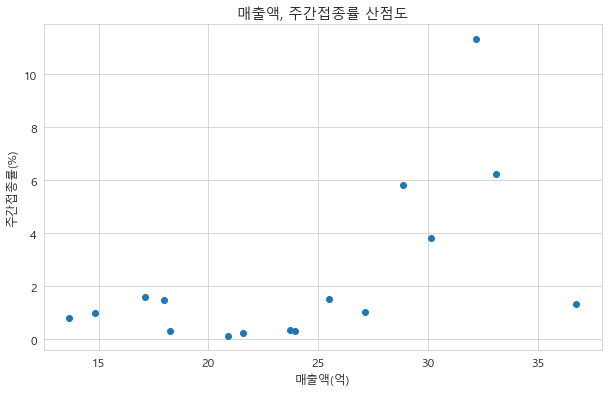

In [31]:
#주간접종률 - 2019년 대비 매출액 매출액 산점도
plt.scatter(final_df['매출액']/100000000, final_df['주간접종자합계']/9828094*100)
plt.title('매출액, 주간접종률 산점도')

ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.xlabel('매출액(억)')
plt.ylabel('주간접종률(%)')

ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.get_xaxis().get_major_formatter().set_scientific(False)

In [32]:
final_df_modi = final_df.loc[:,['매출액','누적접종자합계','주간접종자합계']]


final_df_modi['누적접종자합계'] = final_df_modi['누적접종자합계']/9828094*100
final_df_modi['주간접종자합계'] = final_df_modi['주간접종자합계']/9828094*100

final_df_modi.rename(columns={
                              '누적접종자합계':'누적접종률(%)',
                              '주간접종자합계':'주간접종률(%)'}, inplace = True)

In [33]:
final_df_modi

,매출액,누적접종률(%),주간접종률(%)
0,2370034110,1.11,0.36
1,2089378170,1.26,0.15
2,2156717370,1.50,0.24
3,2394668990,1.82,0.32
4,1826626560,2.12,0.30
5,1481982720,3.13,1.01
6,1709790330,4.74,1.61
7,1796128240,6.22,1.48
8,2713673630,7.26,1.04
9,1365881880,8.06,0.80


array([[<AxesSubplot:xlabel='매출액', ylabel='매출액'>,
        <AxesSubplot:xlabel='누적접종률(%)', ylabel='매출액'>,
        <AxesSubplot:xlabel='주간접종률(%)', ylabel='매출액'>],
       [<AxesSubplot:xlabel='매출액', ylabel='누적접종률(%)'>,
        <AxesSubplot:xlabel='누적접종률(%)', ylabel='누적접종률(%)'>,
        <AxesSubplot:xlabel='주간접종률(%)', ylabel='누적접종률(%)'>],
       [<AxesSubplot:xlabel='매출액', ylabel='주간접종률(%)'>,
        <AxesSubplot:xlabel='누적접종률(%)', ylabel='주간접종률(%)'>,
        <AxesSubplot:xlabel='주간접종률(%)', ylabel='주간접종률(%)'>]], dtype=object)

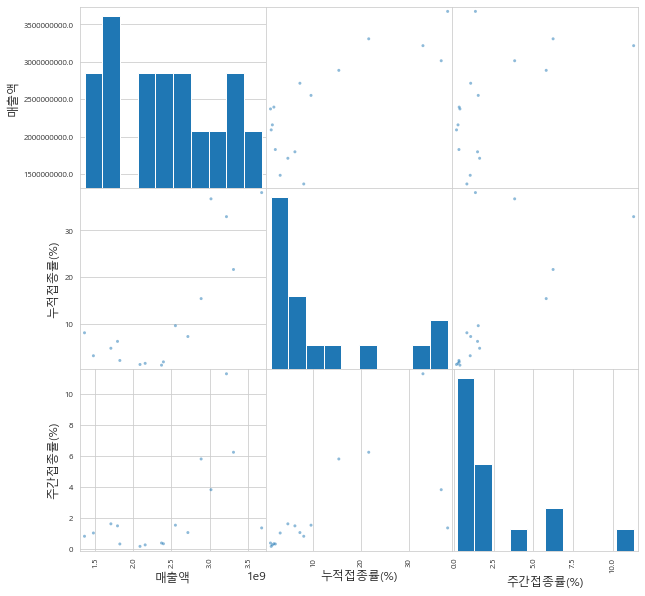

In [34]:
plt.rcParams["figure.figsize"] = (10, 10)
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12
pd.plotting.scatter_matrix(final_df_modi)

In [35]:
sns.set_style("darkgrid")

In [36]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

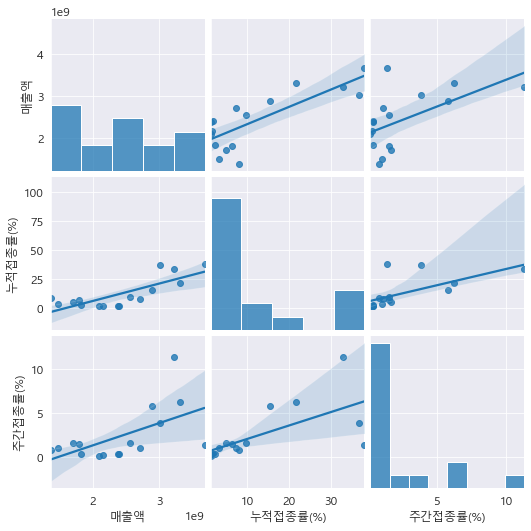

In [37]:
sns.pairplot(final_df_modi,kind='reg')

In [38]:
pearsonr(final_df_modi['매출액'],final_df_modi['주간접종률(%)']) 

#p value가 0.05 미만이므로 유의미한 상관성이 있으며
# 상관계수가 0.57이므로, 보통의 상관관계가 있다고 볼 수 있다.

(0.5688300866681443, 0.021480252505826934)

In [39]:
pearsonr(final_df_modi['매출액'],final_df_modi['누적접종률(%)']) 

#p value가 0.05 미만이므로 유의미한 상관성이 있으며
# 상관계수가 0.79이므로, 아주 강한 상관관계가 있다고 볼 수 있다.

(0.7879655314227366, 0.0002888065130348548)

# 상관행렬 작성

In [40]:
import numpy as np
mat = np.zeros_like(final_df_modi.corr(method = 'pearson'))


<Figure size 864x720 with 0 Axes>

<AxesSubplot:>

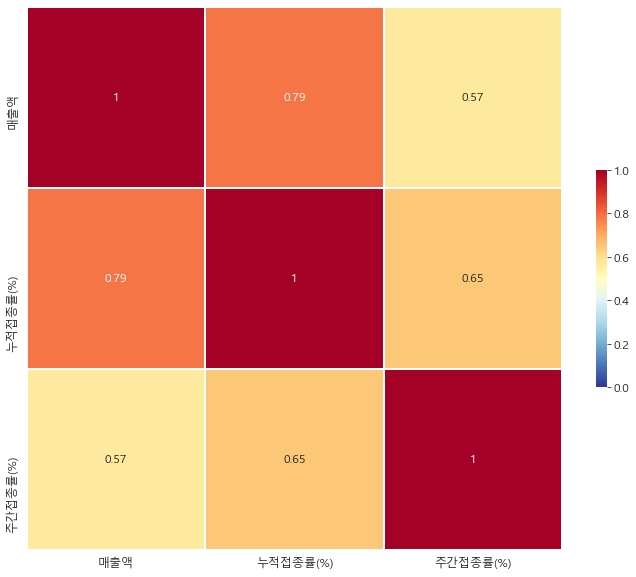

In [41]:
plt.figure(figsize=(12,10))
sns.heatmap(final_df_modi.corr(method = 'pearson'),
            vmin = 0, vmax = +1, 
            annot = True, 
            cmap = 'RdYlBu_r', 
            linewidths=1,
            cbar_kws={"shrink": 0.4},
            mask = mat)